<a href="https://colab.research.google.com/github/anmol0720/Building-ANN-using-Keras/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as npl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [13]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [0]:
from sklearn.model_selection import train_test_split
x_train_t,x_test,y_train_t,y_test=train_test_split(housing.data,housing.target,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_t,y_train_t,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
x_train.shape

(11610, 8)

In [0]:
model=keras.models.Sequential([
                              keras.layers.Dense(30,activation='relu',input_shape=[8]),
                              keras.layers.Dense(30,activation='relu'),
                              keras.layers.Dense(1)
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['mae'])

In [28]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8861 - mae: 0.9900 - val_loss: 0.7125 - val_mae: 0.6368
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6878 - val_mae: 0.5704
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5802 - val_mae: 0.5352
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5560 - mae: 0.5398 - val_loss: 0.5165 - val_mae: 0.5207
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4894 - val_mae: 0.5022
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4949 - val_mae: 0.4934
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4860 - val_mae: 0.4838
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [29]:
mae_test=model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3718 - mae: 0.4346


In [31]:
model_history.history

{'loss': [1.8861355781555176,
  0.6577337384223938,
  0.593379020690918,
  0.5560135841369629,
  0.5272431373596191,
  0.5033366084098816,
  0.4854241907596588,
  0.47092896699905396,
  0.4576731324195862,
  0.4475175738334656,
  0.43928346037864685,
  0.4316796064376831,
  0.42597439885139465,
  0.42015188932418823,
  0.41536402702331543,
  0.4111071825027466,
  0.40782636404037476,
  0.40393680334091187,
  0.40037640929222107,
  0.39801669120788574,
  0.3949580788612366,
  0.39261725544929504,
  0.3897463381290436,
  0.38744258880615234,
  0.3850952684879303,
  0.38283270597457886,
  0.3809262216091156,
  0.3787383735179901,
  0.3769131004810333,
  0.3749280273914337],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618006587028503,
  0.5398454070091248,
  0.5237292647361755,
  0.5112563371658325,
  0.5010154247283936,
  0.492448091506958,
  0.4857262372970581,
  0.47973746061325073,
  0.4744162857532501,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0

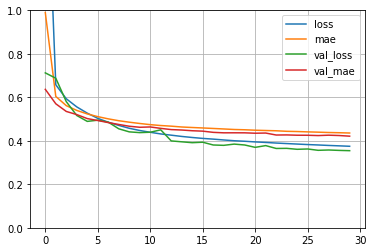

In [32]:
pd.DataFrame(model_history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
x_new=x_test[:3]

In [34]:
pred=model.predict(x_new)
print(pred)

[[0.58085257]
 [1.9019513 ]
 [3.6079113 ]]


In [35]:
print(y_test[:3])

[0.477   0.458   5.00001]
